In [5]:
import control 
import numpy as np 
import matplotlib.pyplot as plt
import pyfirmata
import time


In [6]:
#https://realpython.com/arduino-python/
#pip install pyfirmata
#### --------------------------- CHECKING CODE --------------------------------

board = pyfirmata.Arduino('/dev/ttyACM0')
idPwm = 8;
while True:
    board.digital[idPwm].write(1)
    time.sleep(1)
    board.digital[idPwm].write(0)
    time.sleep(1)

KeyboardInterrupt: 

In [7]:
board.digital[idPwm].write(0)

In [46]:

#### --------------------------- AUFGABE 1: LESEN  -------------------------------
idAnalogue = 0;
idPwm = 8;
# 10 Bits - Analog to digital converter: 2^10 
A2D_v = 5;
flgStart = 1;
Ts = 0.02;
idxTimer = 0; 
Tab_val = [0];
Tab_time = [0];
uControl = [0];

it = pyfirmata.util.Iterator(board)
it.start()
potentiometer = board.analog[idAnalogue]
potentiometer.enable_reporting()

board.digital[idPwm].write(uControl)
time.sleep(1)

while flgStart == 1:
        u = 1;
        board.digital[idPwm].write(u)
        valRaw = potentiometer.read();
        print(valRaw)
        val = valRaw * A2D_v;
        
        time.sleep(Ts)
        idxTimer = idxTimer + 1;
        Tab_val.append(val);
        uControl.append(5*u);
        Tab_time.append(idxTimer*Ts);

        if idxTimer == Ts*3000:
            flgStart = 0; 
    

0.0039
0.043
0.1476
0.2473
0.3275
0.4047
0.4702
0.5777
0.6207
0.6618
0.696
0.7292
0.7566
0.783
0.8055
0.824
0.8426
0.8573
0.8729
0.8847
0.8974
0.9071
0.9238
0.9316
0.9316
0.9443
0.9492
0.9541
0.957
0.9619
0.9658
0.9677
0.9707
0.9746
0.9775
0.9775
0.9795
0.9804
0.9853
0.9863
0.9873
0.9873
0.9892
0.9902
0.9912
0.9912
0.9912
0.9922
0.9922
0.9941
0.9922
0.9941
0.9951
0.9941
0.9951
0.9951
0.9961
0.9951
0.9951
0.9961


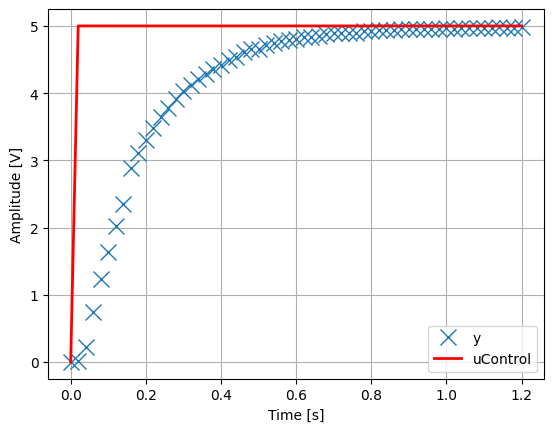

In [48]:
plt.plot(Tab_time,Tab_val,'x',linewidth = 2, markersize=12,label='y')
plt.plot(Tab_time,uControl,'r',linewidth = 2,label='uControl')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [V]')
plt.grid()
plt.legend()
plt.show()

121